# 단순성형회귀(Linear Regression)

### 아버지와 아들의 키 - Galton

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline

In [20]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


### 아버지와 아들의 키만 발췌

In [22]:
df = df[df.Gender == 'M']
height = df=df[['Father', 'Height']].rename(columns={'Height' : 'Son'})
height.Father = height.Father * 2.54 # 단위를 인치에서 cm로 변환
height.Son = height.Son * 2.54
height.describe()

,Father,Son
count,465.000000,465.000000
mean,175.687157,175.841196
std,5.841820,6.684249
min,157.480000,152.400000
25%,172.720000,171.450000
50%,175.260000,175.768000
75%,179.070000,180.340000
max,199.390000,200.660000


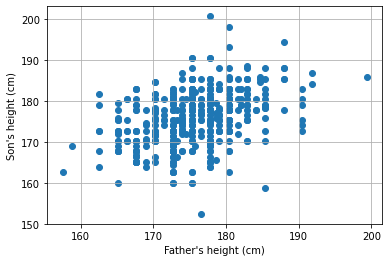

In [23]:
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

### Numpy를 이용해서 회귀선 구하기

In [24]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [25]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)

In [26]:
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [27]:
# 기울기와 절편
m, c = reg[0]

In [28]:
# 잔차 제곱의 합 (Residual Sum of Square)
rss = reg[1][0]

In [29]:
print(f'기울기 : {m:.4f}, 절편: {c:.4f}, 잔차제곱: {rss:.2f}')

기울기 : 0.4477, 절편: 97.1776, 잔차제곱: 17556.60


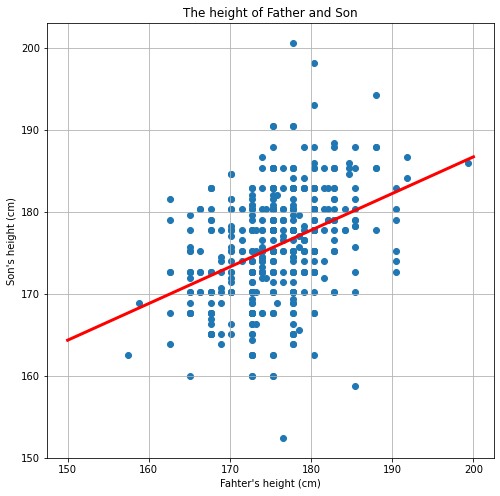

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.plot([150,200], [m*150+c, m*200+c], 'r', lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Fahter's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

### Scikit-Learn을 이용해서 구하기

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
X = height.Father.values.reshape(-1,1)
y = height.Son.values

In [33]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [35]:
weight, bias = lr.coef_, lr.intercept_ # coefficient(계수), intercept(절편)
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.60


In [37]:
score = lr.score(X, y)
print(f'R_squared score: {score:.4f}')

R_squared score: 0.1531


### 당뇨병 데이터셋

In [41]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [43]:
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [47]:
X = diabetes.data[:, 2].reshape(-1, 1)
y = diabetes.target

In [53]:
X.shape

(442, 1)

In [54]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [55]:
weight, bias = lr.coef_, lr.intercept_ # coefficient(계수), intercept(절편)
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')

기울기: 949.4353, 절편: 152.1335, 잔차제곱: 1719581.81


### 훈련/테스트 데이터 셋 분리후 학습/예측/평가

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.05, random_state = 2021
)

In [58]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')

Mean Squared Error: 3470.1713, RMSE: 58.9082


In [63]:
score = r2_score(y_test, pred)
print(f'R_squared: {score:.4f}')

R_squared: 0.0939


### 그래프로 확인

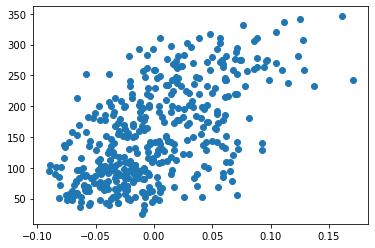

In [65]:
plt.scatter(X_train,y_train);

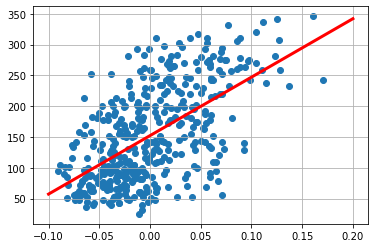

In [67]:
plt.scatter(X_train,y_train)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

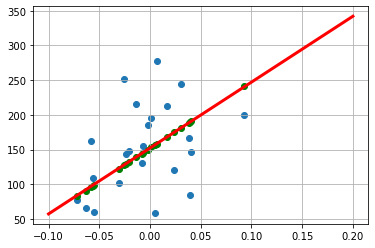

In [69]:
plt.scatter(X_test,y_test)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

### 당뇨병 vs BP

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:, 3], y, test_size = 0.05, random_state=2021
)

In [72]:
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
weight, bias = lr.coef_, lr.intercept_ # coefficient(계수), intercept(절편)
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')

기울기: 702.8299, 절편: 151.8194, 잔차제곱: 2064342.24


In [75]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')

Mean Squared Error: 3470.1713, RMSE: 58.9082


In [77]:
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')

Mean Squared Error: 1999.8592, RMSE: 44.7198


In [78]:
score = r2_score(y_test, pred)
print(f'R_squared: {score:.4f}')

R_squared: 0.4778


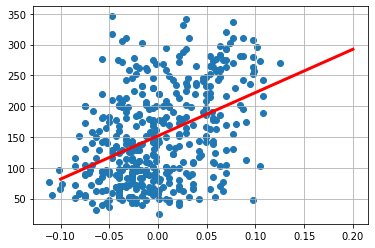

In [79]:
plt.scatter(X_train,y_train)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

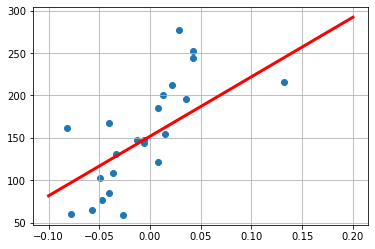

In [80]:
plt.scatter(X_test,y_test)
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3)
plt.grid()
plt.show()

### 회귀 표본 만들기

In [81]:
from sklearn.datasets import make_regression

In [84]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, random_state=2021)

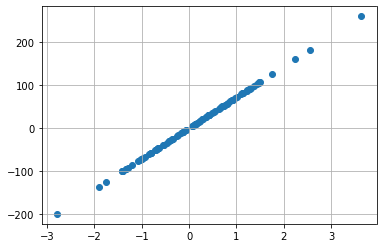

In [85]:
plt.scatter(X,y)
plt.grid()
plt.show()

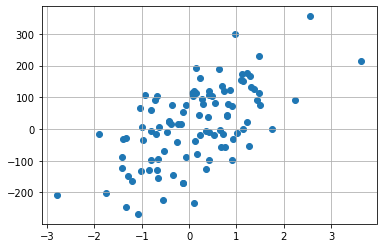

In [87]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise = 100 , random_state=2021)
plt.scatter(X,y)
plt.grid()
plt.show()

In [90]:
lr = LinearRegression()
lr.fit(X,y)
weight, bias = lr.coef_, lr.intercept_

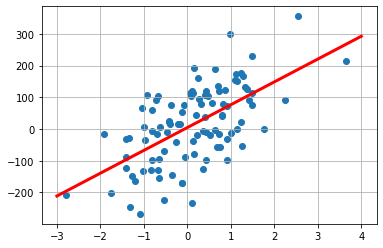

In [92]:
plt.scatter(X,y)
plt.plot([-3, 4], [-3*weight+bias, 4*weight+bias], 'r', lw=3)
plt.grid()
plt.show()